# CH 03

# word2vec (추론기반 기법을 이용한)

In [1]:
import numpy as np

c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7, 3)
h = np.matmul(c, W)

print(h)

[[-0.32808826  0.60977809 -0.77278781]]


In [2]:
import sys 
sys.path.append("..")
import numpy as np
from common.layers import MatMul

c = np. array([1, 0, 0, 0, 0, 0, 0])
W = np.random.randn(7, 3)
layer = MatMul(W)
h = layer.forward(c)
print(h)

[-1.10942369  0.21608234 -0.93546416]


In [3]:
import sys
sys.path.append("..")
import numpy as np
from common.layers import MatMul

c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5*(h0+h1)
s = out_layer.forward(h)

print(s)


[[-1.20881935  0.79832445 -2.83298185 -2.3009472  -0.69903025  0.29783418
   0.61601215]]


In [10]:
import sys
sys.path.append("..")
from common.util import preprocess

text = "You say goodbye and I say hello."
corpus, word_to_in, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [11]:
def create_contexts_target(corpus, window_size = 1):
    target = corpus[window_size:-window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size +1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)
        
    return np.array(contexts), np.array(target)

In [12]:
contexts, target =create_contexts_target(corpus, window_size=1)

print(contexts)

print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


In [13]:
import sys
sys.path.append("..")
from common.util import preprocess, create_contexts_target, convert_one_hot

text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus,window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

| 에폭 1 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 2 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 3 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 4 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 5 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 6 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 7 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 8 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 9 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 10 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 11 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 12 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 13 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 14 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 15 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 16 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 17 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 18 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 19 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 20 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 21 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 22 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 23 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 24 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 25 |  반복 1 / 1 | 시간 0[s] | 손실 1.79
| 에폭 26 |

| 에폭 310 |  반복 1 / 1 | 시간 0[s] | 손실 1.15
| 에폭 311 |  반복 1 / 1 | 시간 0[s] | 손실 1.23
| 에폭 312 |  반복 1 / 1 | 시간 0[s] | 손실 1.23
| 에폭 313 |  반복 1 / 1 | 시간 0[s] | 손실 1.22
| 에폭 314 |  반복 1 / 1 | 시간 0[s] | 손실 1.32
| 에폭 315 |  반복 1 / 1 | 시간 0[s] | 손실 1.13
| 에폭 316 |  반복 1 / 1 | 시간 0[s] | 손실 1.22
| 에폭 317 |  반복 1 / 1 | 시간 0[s] | 손실 1.22
| 에폭 318 |  반복 1 / 1 | 시간 0[s] | 손실 1.21
| 에폭 319 |  반복 1 / 1 | 시간 0[s] | 손실 1.13
| 에폭 320 |  반복 1 / 1 | 시간 0[s] | 손실 1.20
| 에폭 321 |  반복 1 / 1 | 시간 0[s] | 손실 1.12
| 에폭 322 |  반복 1 / 1 | 시간 0[s] | 손실 1.12
| 에폭 323 |  반복 1 / 1 | 시간 0[s] | 손실 1.20
| 에폭 324 |  반복 1 / 1 | 시간 0[s] | 손실 1.11
| 에폭 325 |  반복 1 / 1 | 시간 0[s] | 손실 1.30
| 에폭 326 |  반복 1 / 1 | 시간 0[s] | 손실 1.29
| 에폭 327 |  반복 1 / 1 | 시간 0[s] | 손실 1.10
| 에폭 328 |  반복 1 / 1 | 시간 0[s] | 손실 1.19
| 에폭 329 |  반복 1 / 1 | 시간 0[s] | 손실 1.18
| 에폭 330 |  반복 1 / 1 | 시간 0[s] | 손실 1.20
| 에폭 331 |  반복 1 / 1 | 시간 0[s] | 손실 1.09
| 에폭 332 |  반복 1 / 1 | 시간 0[s] | 손실 1.18
| 에폭 333 |  반복 1 / 1 | 시간 0[s] | 손실 1.19
| 에폭 334 |  반복 1

| 에폭 631 |  반복 1 / 1 | 시간 0[s] | 손실 0.77
| 에폭 632 |  반복 1 / 1 | 시간 0[s] | 손실 0.65
| 에폭 633 |  반복 1 / 1 | 시간 0[s] | 손실 0.89
| 에폭 634 |  반복 1 / 1 | 시간 0[s] | 손실 0.88
| 에폭 635 |  반복 1 / 1 | 시간 0[s] | 손실 0.67
| 에폭 636 |  반복 1 / 1 | 시간 0[s] | 손실 0.77
| 에폭 637 |  반복 1 / 1 | 시간 0[s] | 손실 1.00
| 에폭 638 |  반복 1 / 1 | 시간 0[s] | 손실 0.77
| 에폭 639 |  반복 1 / 1 | 시간 0[s] | 손실 0.88
| 에폭 640 |  반복 1 / 1 | 시간 0[s] | 손실 0.91
| 에폭 641 |  반복 1 / 1 | 시간 0[s] | 손실 0.88
| 에폭 642 |  반복 1 / 1 | 시간 0[s] | 손실 0.88
| 에폭 643 |  반복 1 / 1 | 시간 0[s] | 손실 0.91
| 에폭 644 |  반복 1 / 1 | 시간 0[s] | 손실 0.90
| 에폭 645 |  반복 1 / 1 | 시간 0[s] | 손실 0.78
| 에폭 646 |  반복 1 / 1 | 시간 0[s] | 손실 0.90
| 에폭 647 |  반복 1 / 1 | 시간 0[s] | 손실 0.77
| 에폭 648 |  반복 1 / 1 | 시간 0[s] | 손실 0.87
| 에폭 649 |  반복 1 / 1 | 시간 0[s] | 손실 0.88
| 에폭 650 |  반복 1 / 1 | 시간 0[s] | 손실 0.77
| 에폭 651 |  반복 1 / 1 | 시간 0[s] | 손실 0.87
| 에폭 652 |  반복 1 / 1 | 시간 0[s] | 손실 0.76
| 에폭 653 |  반복 1 / 1 | 시간 0[s] | 손실 0.87
| 에폭 654 |  반복 1 / 1 | 시간 0[s] | 손실 0.76
| 에폭 655 |  반복 1

| 에폭 959 |  반복 1 / 1 | 시간 1[s] | 손실 0.79
| 에폭 960 |  반복 1 / 1 | 시간 1[s] | 손실 0.91
| 에폭 961 |  반복 1 / 1 | 시간 1[s] | 손실 0.79
| 에폭 962 |  반복 1 / 1 | 시간 1[s] | 손실 0.68
| 에폭 963 |  반복 1 / 1 | 시간 1[s] | 손실 0.59
| 에폭 964 |  반복 1 / 1 | 시간 1[s] | 손실 0.82
| 에폭 965 |  반복 1 / 1 | 시간 1[s] | 손실 0.81
| 에폭 966 |  반복 1 / 1 | 시간 1[s] | 손실 0.79
| 에폭 967 |  반복 1 / 1 | 시간 1[s] | 손실 0.81
| 에폭 968 |  반복 1 / 1 | 시간 1[s] | 손실 0.56
| 에폭 969 |  반복 1 / 1 | 시간 1[s] | 손실 0.68
| 에폭 970 |  반복 1 / 1 | 시간 1[s] | 손실 0.68
| 에폭 971 |  반복 1 / 1 | 시간 1[s] | 손실 0.68
| 에폭 972 |  반복 1 / 1 | 시간 1[s] | 손실 0.70
| 에폭 973 |  반복 1 / 1 | 시간 1[s] | 손실 0.68
| 에폭 974 |  반복 1 / 1 | 시간 1[s] | 손실 0.91
| 에폭 975 |  반복 1 / 1 | 시간 1[s] | 손실 0.91
| 에폭 976 |  반복 1 / 1 | 시간 1[s] | 손실 0.69
| 에폭 977 |  반복 1 / 1 | 시간 1[s] | 손실 0.68
| 에폭 978 |  반복 1 / 1 | 시간 1[s] | 손실 0.81
| 에폭 979 |  반복 1 / 1 | 시간 1[s] | 손실 0.68
| 에폭 980 |  반복 1 / 1 | 시간 1[s] | 손실 0.67
| 에폭 981 |  반복 1 / 1 | 시간 1[s] | 손실 0.58
| 에폭 982 |  반복 1 / 1 | 시간 1[s] | 손실 0.79
| 에폭 983 |  반복 1

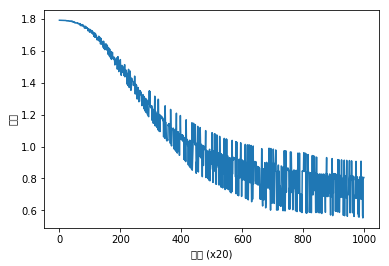

In [9]:
import sys
sys.path.append("..")
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size= 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word, preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus,window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [14]:
def forward(sefl,contexts, target):
    h0 = self.in_layer0.forward(contexts[:, 0])
    h1 = self.in_layer1.forward(contexts[:, 1])
    h = (h0 + h1) *0.5
    score = self.out_layer.forward(h)
    loss = self.loss_layer.forward(score, target)
    return loss

In [15]:
def backward(self, dout =1):
    ds = self.loss_layer.backward(dout)
    da = self.out_layer.backward(ds)
    da *= 0.5
    self.in_layer1.backward(da)
    self.in_layer0.backward(da)
    return None

In [11]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 0.78605604 -0.8283634   0.81549186  0.74993914 -0.8067332 ]
say [-0.84193987  0.7843994  -0.8670853  -0.85496646  0.8783816 ]
goodbye [ 0.68863314 -0.70522434  0.6754646   0.73089194 -0.6814373 ]
and [-0.87087226  0.77236974 -0.8697718  -0.8652604   0.86404264]
i [ 0.703997  -0.7080483  0.6565967  0.7139247 -0.653822 ]
hello [ 0.7759653  -0.81010586  0.7956975   0.77649015 -0.78700763]
